In [0]:
import torch

In [0]:
x = torch.tensor(
    [[1., 2., 3., 4.],
    [5., 6., 7., 8.],
    [9., 10., 11., 12.]], requires_grad=True)

In [0]:
device = torch.device('cuda:0'
                      if torch.cuda.is_available()
                      else 'cpu')
x = x.to(device)

In [0]:
function = 10 * (x**2).sum()

In [0]:
function.backward()

In [8]:
print(x.grad, '<-gradient')

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]]) <-gradient


In [0]:
x.data -= 0.001 * x.grad

In [14]:
x.grad.zero_()

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [0]:
x = torch.tensor([8., 8.], requires_grad=True)

In [0]:
optimizer = torch.optim.SGD([x], lr=0.001)

In [0]:
def function_parabola(variable):
    return 10 * (variable**2).sum()

In [0]:
def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    optimizer.step()
    optimizer.zero_grad()

In [0]:
var_history = []
fn_history = []

for i in range(500):
    var_history.append(x.data.numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def show_contours(objective,
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

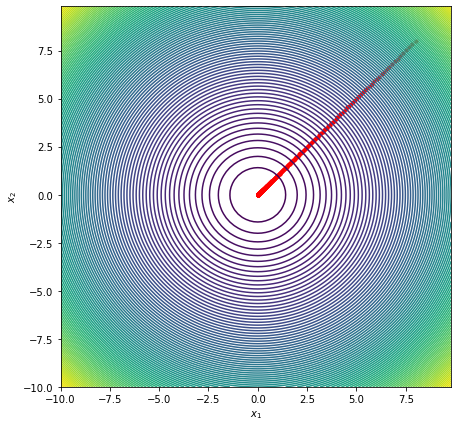

In [33]:
show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');

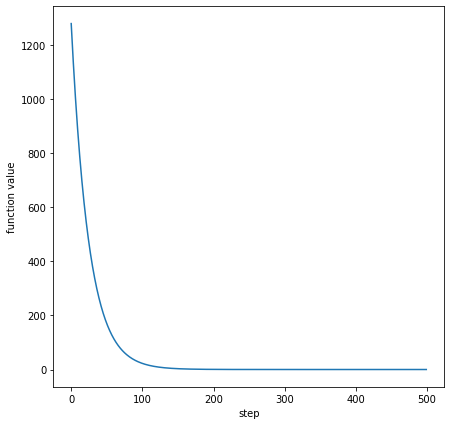

In [35]:
plt.figure(figsize=(7,7))
plt.plot(fn_history)
plt.xlabel('step')
plt.ylabel('function value');

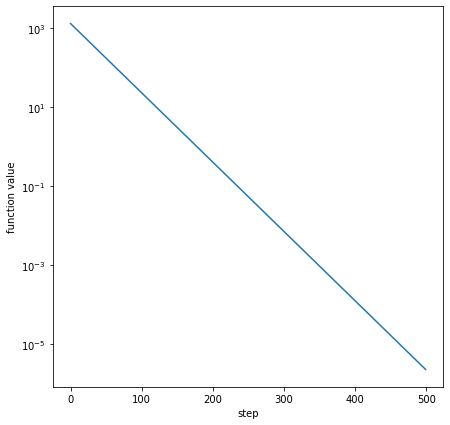

In [36]:
plt.figure(figsize=(7,7))
plt.semilogy(fn_history)
plt.xlabel('step')
plt.ylabel('function value');

In [0]:
def function_skewed(variable):
    gramma = torch.tensor([[1., -1.], [1., 1.]]) @ torch.tensor([[1.0, 0.0], [0.0, 4.0]])
    res = 10 * (variable.unsqueeze(0) @ (gramma @ variable.unsqueeze(1))).sum()
    return res

In [0]:
def function_skewed_np(variable):
    gramma = np.array([[1, -1], [1, 1]]) @ np.array([[1.0, 0.0], [0.0, 4.0]])
    res = 10 * (variable.transpose(1, 0) @ (gramma @ variable)).sum()
    return res

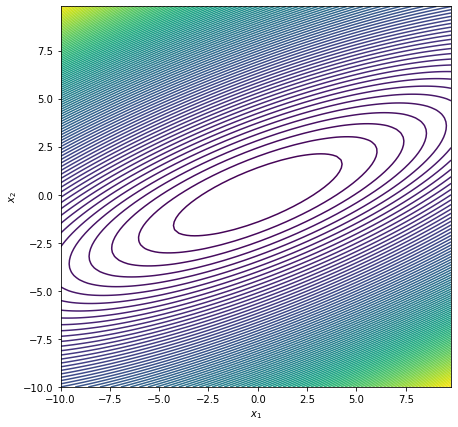

In [39]:
show_contours(function_skewed_np)

In [0]:
x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

optimizer = torch.optim.SGD([x], lr=0.001)

for i in range(500):
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_skewed(x).data.cpu().numpy().copy())
    make_gradient_step(function_skewed, x)

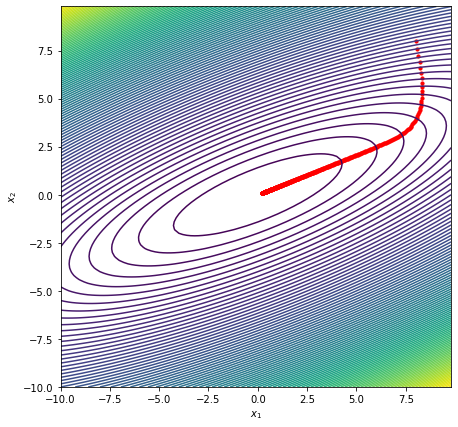

In [42]:
show_contours(function_skewed_np)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');

Task

In [0]:
w = torch.tensor([
      [5., 10.],
      [1., 2.]], requires_grad=True)
opt = torch.optim.SGD([w], lr=0.001)

In [0]:
function = torch.log(torch.log(w+7)).prod()

In [0]:
function.backward()

In [12]:
print(w.grad)

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]])


In [0]:
for _ in range(500):
    function = (w+7).log().log().prod()
    function.backward()
    opt.step()
    opt.zero_grad()

In [27]:
print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)
